In [1]:
from tabula import read_pdf


In [2]:
path_assignment = "Assignment4.pdf"

In [4]:
#reads table from the pdf file
df = read_pdf(path_assignment,pages="all")

In [7]:
# df

In [9]:
data_2020 = df[0]

In [12]:
data_2020['Grass'] = range(16)

In [14]:
data_2020['Grass'] = ['Dry','Wet','Dry','Wet','Wet','Wet', 'Dry','Wet', 'Dry','Dry','Dry','Dry','Dry','Wet','Wet', 'Dry']

In [15]:
data_2020

,Rain,Sprinkler,Grass
0,No,No,Dry
1,No,Yes,Wet
2,No,No,Dry
3,No,Yes,Wet
4,Yes,No,Wet
5,No,Yes,Wet
6,No,No,Dry
7,Yes,Yes,Wet
8,No,No,Dry
9,No,Yes,Dry


## Problem 1 (25 points). 
Suppose David wants to use information gain in the decision tree
algorithm. But David does not know how to run decision tree algorithm. Please help him. Please
illustrate how to train the decision tree by using the training Dataset A in Table 1.

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, precision_recall_fscore_support,roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.inspection import DecisionBoundaryDisplay


In [93]:
clf = DecisionTreeClassifier(random_state=0, criterion='entropy')
le = LabelEncoder()
data_2020['Rain'] = le.fit_transform(data_2020['Rain'])
data_2020['Sprinkler'] = le.fit_transform(data_2020['Sprinkler'])
data_2020['Grass'] = le.fit_transform(data_2020['Grass'])

In [94]:
data_2020

,Rain,Sprinkler,Grass
0,0,0,0
1,0,1,1
2,0,0,0
3,0,1,1
4,1,0,1
5,0,1,1
6,0,0,0
7,1,1,1
8,0,0,0
9,0,1,0


In [95]:
# clf.fit(data_2020[['Rain','Sprinkler']], data_2020['Grass'])
X = data_2020[['Rain','Sprinkler']]
y = data_2020['Grass']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)

## Visualize the Decision Boundary

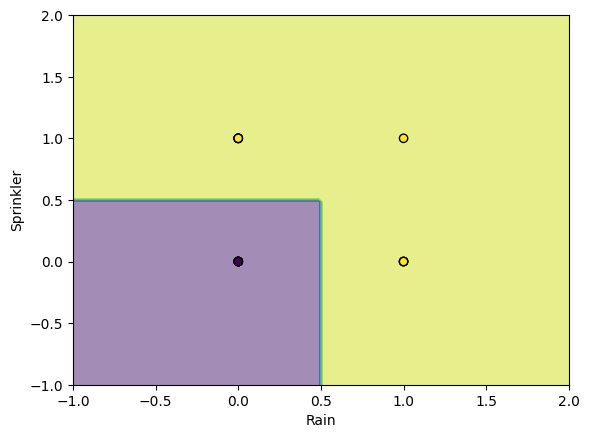

In [96]:
disp = DecisionBoundaryDisplay.from_estimator(clf, X, response_method="predict",alpha=0.5)
disp.ax_.scatter(data_2020['Rain'], data_2020['Sprinkler'], c=data_2020['Grass'].to_numpy(), edgecolor="k")
plt.show()

# Problem 2 
Suppose David wants to use Dataset B in Table 2 as the testing dataset to
test the various accuracy values of the decision tree constructed in Problem 1. Please use the
decision tree constructed in Problem 1 to test the data records in Table 2. Compare the
predicted results with the observed results for “Grass”. Construct the confusion matrix and
explain how to compute the following accuracy values.
## Calculate the metrics

In [103]:
data_2021 = df[1]

In [105]:
data_2021['Grass'] = ['Wet', 'Dry', 'Dry', 'Wet', 'Wet','Dry', 'Dry', 'Wet', 'Wet', 'Dry']

In [97]:

pred = clf.predict(data_2021[['Rain','Sprinkler']])
Y_test = y_test
Y_preds = pred
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / tp + fn
print('Precision                                   : %.3f'%precision_score(Y_test, Y_preds))
print('Recall                                      : %.3f'%recall_score(Y_test, Y_preds))
print('F1-Score                                    : %.3f'%f1_score(Y_test, Y_preds))
print('AUC (area under curve)                      : %.3f'%roc_auc_score(Y_test, Y_preds))
print('\nPrecision Recall F1-Score Support Per Class : \n',precision_recall_fscore_support(Y_test, Y_preds))
print('Sensitivity                                 : %.3f'%sensitivity)
print('Specifity.                                  : %.3f'%specificity)

print('\nClassification Report                       : ')
print(classification_report(Y_test, Y_preds))

Precision                                   : 0.500
Recall                                      : 1.000
F1-Score                                    : 0.667
AUC (area under curve)                      : 0.833

Precision Recall F1-Score Support Per Class : 
 (array([1. , 0.5]), array([0.66666667, 1.        ]), array([0.8       , 0.66666667]), array([3, 1]))
Sensitivity                                 : 1.000
Specifity.                                  : 0.667

Classification Report                       : 
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



### Plot confusion Matrix

/Users/trilokpadhi/PycharmProjects/consumer_content_mapping/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


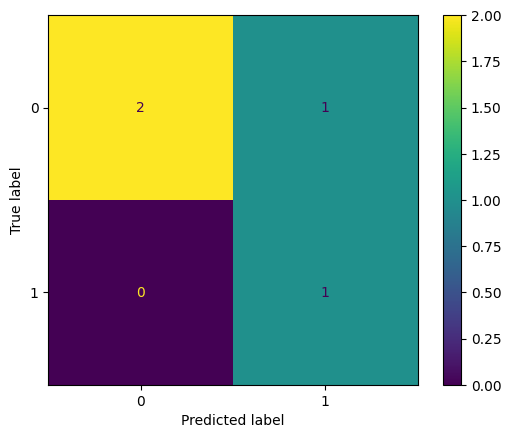

In [98]:
plot_confusion_matrix(clf, X_test, y_test) 

# Problem 3 (25 points). 
Suppose David wants to use Naïve Bayesian Classifier to predict the label
(“Grass”) of the fourth record in Dataset B in Table 2:
“Rain” = “No”, “Sprinkler” = “Yes”, and “Grass” = “Wet”.
Please illustrate how to use naïve Bayesian classifier to predict the label (“Grass”) of the data
object (“Rain” = “No”, “Sprinkler” = “Yes”).

In [99]:
from sklearn.naive_bayes import GaussianNB
X = data_2020[['Rain','Sprinkler']]
y = data_2020['Grass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [100]:
print("Number of mislabeled points out of a total %d points : %d"
...       % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 10 points : 3


In [102]:
# Predict for (“Rain” = “No”, “Sprinkler” = “Yes”).
gnb.predict([[0,1]])

/Users/trilokpadhi/PycharmProjects/consumer_content_mapping/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1])